In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
file_path='C:/Users/MOHAMED ANAS/Downloads/train.csv/train.csv'
df = pd.read_csv(file_path)
print(df.head())

   acoustic_data  time_to_failure
0             12           1.4691
1              6           1.4691
2              8           1.4691
3              5           1.4691
4              8           1.4691


In [2]:
print(df.shape)

(629145480, 2)


In [3]:
# Checking for Nulls
df.isnull().sum()

acoustic_data      0
time_to_failure    0
dtype: int64

In [4]:
# Checking for NaNs
df.isna().sum()

acoustic_data      0
time_to_failure    0
dtype: int64

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629145480 entries, 0 to 629145479
Data columns (total 2 columns):
 #   Column           Dtype  
---  ------           -----  
 0   acoustic_data    int64  
 1   time_to_failure  float64
dtypes: float64(1), int64(1)
memory usage: 9.4 GB
None


In [6]:
print(df.describe())

       acoustic_data  time_to_failure
count   6.291455e+08     6.291455e+08
mean    4.519468e+00     5.678292e+00
std     1.073571e+01     3.672697e+00
min    -5.515000e+03     9.550396e-05
25%     2.000000e+00     2.625997e+00
50%     5.000000e+00     5.349798e+00
75%     7.000000e+00     8.173396e+00
max     5.444000e+03     1.610740e+01


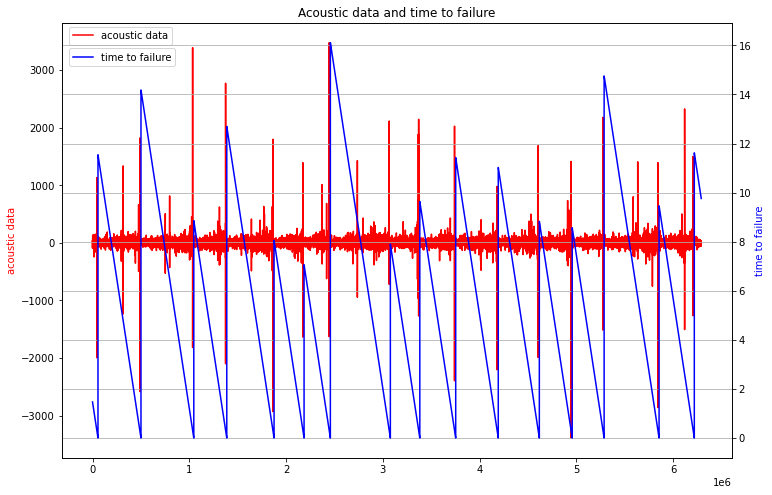

In [7]:
acoustic_data = df['acoustic_data'].values[::100]
timefailure_data = df['time_to_failure'].values[::100] #for every 100 points of data

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.title("Acoustic data and time to failure")
plt.plot(acoustic_data, color='r')
ax1.set_ylabel('acoustic data', color='r')
plt.legend(['acoustic data'], loc=(0.01, 0.95))
ax2 = ax1.twinx()
plt.plot(timefailure_data, color='b')
ax2.set_ylabel('time to failure', color='b')
plt.legend(['time to failure'], loc=(0.01, 0.9))
plt.grid(True)

In [9]:
def plot_data(idx, train_ad_sample_df, train_ttf_sample_df, title="Acoustic data and time to failure"):
    fig, ax1 = plt.subplots(figsize=(12, 8))
    plt.title(title)
    plt.plot(idx, train_ad_sample_df, color='r')
    ax1.set_ylabel('acoustic data', color='r')
    plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(idx, train_ttf_sample_df, color='b')
    ax2.set_ylabel('time to failure', color='b')
    plt.legend(['time to failure'], loc=(0.01, 0.9))
    plt.grid(True)


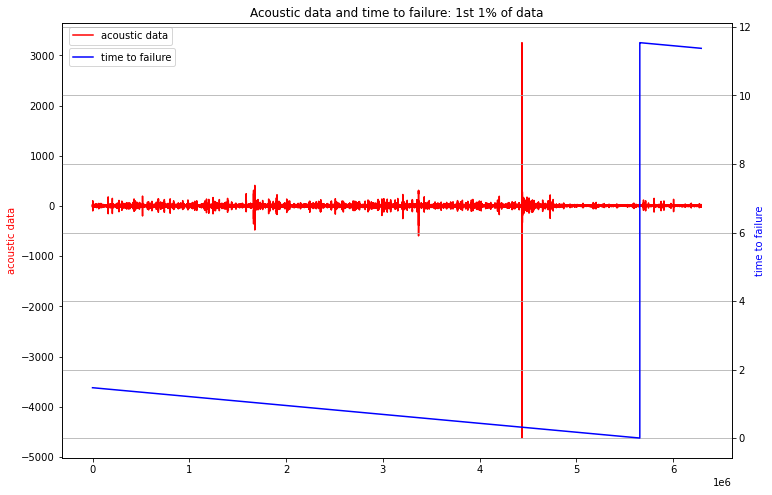

In [10]:
train_ad_sample_1 = df['acoustic_data'].values[:6291455]
train_ttf_sample_1 = df['time_to_failure'].values[:6291455]
idx_1 = df.index[:6291455]
plot_data(idx_1, train_ad_sample_1, train_ttf_sample_1, title="Acoustic data and time to failure: 1st 1% of data")

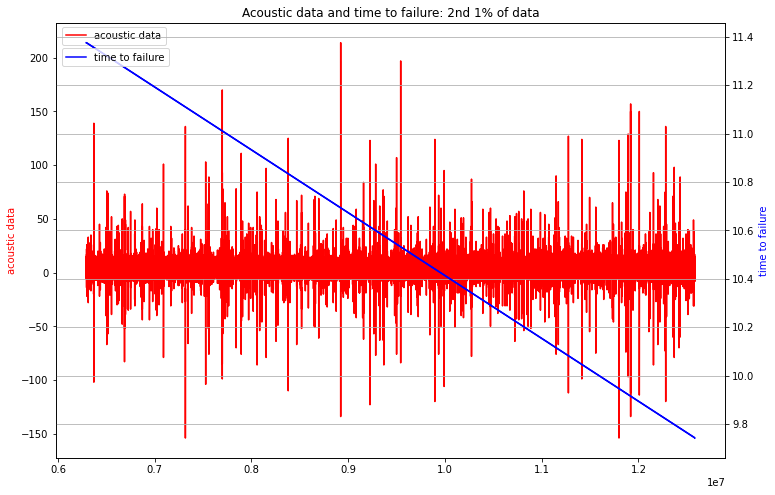

In [11]:
train_ad_sample_2 = df['acoustic_data'].values[6291455:2*6291455]
train_ttf_sample_2 = df['time_to_failure'].values[6291455:2*6291455]
idx_2 = df.index[6291455:2*6291455]
plot_data(idx_2, train_ad_sample_2, train_ttf_sample_2, title="Acoustic data and time to failure: 2nd 1% of data")

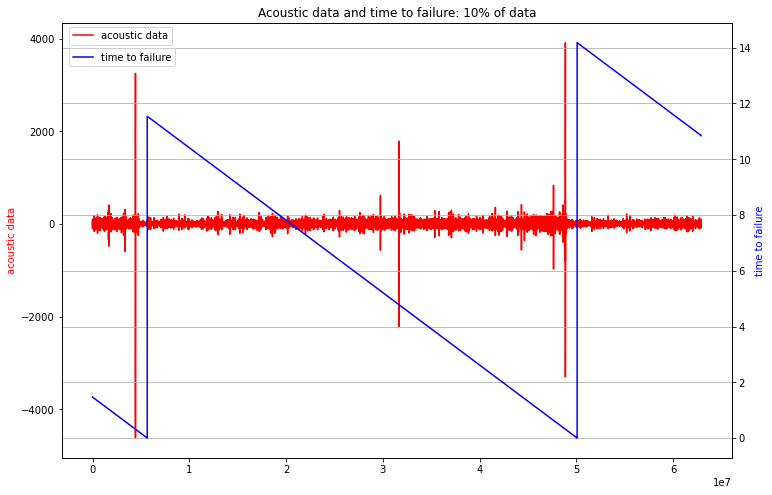

In [12]:
train_ad_sample_10 = df['acoustic_data'].values[:10*6291455]
train_ttf_sample_10 = df['time_to_failure'].values[:10*6291455]
idx_10 = df.index[:10*6291455]
plot_data(idx_10, train_ad_sample_10, train_ttf_sample_10, title="Acoustic data and time to failure: 10% of data")

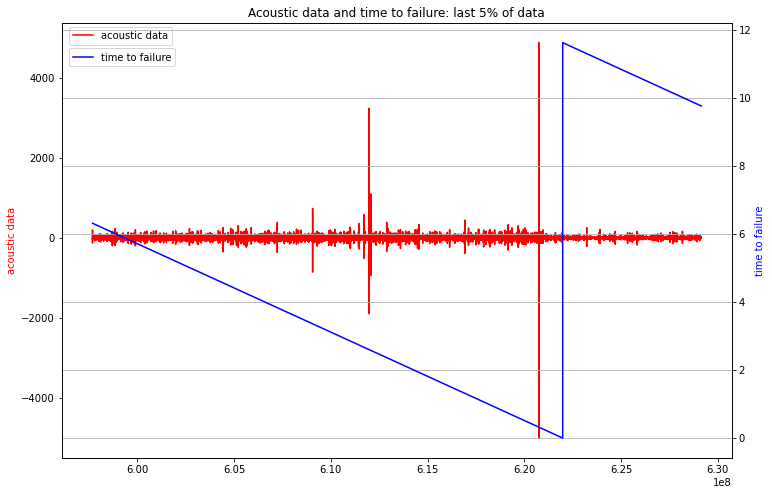

In [13]:
train_ad_sample_last5 = df['acoustic_data'].values[-5*6291455:]
train_ttf_sample_last5 =df['time_to_failure'].values[-5*6291455:]
idx_last5 = df.index[-5*6291455:]
plot_data(idx_last5, train_ad_sample_last5, train_ttf_sample_last5, title="Acoustic data and time to failure: last 5% of data")

In [14]:
def feature_extraction(segment):
    features = []
    features.append(segment.mean())
    features.append(segment.std())
    features.append(segment.min())
    features.append(segment.max())
    features.append(segment.kurtosis())
    features.append(segment.skew())
    return features

#Training data
rows = 150000
segments = int(np.floor(df.shape[0] / rows))
X = pd.DataFrame(index=range(segments), dtype=np.float64)
y = pd.DataFrame(index=range(segments), dtype=np.float64, columns=['time_to_failure'])

for segment in range(segments):
    seg = df.iloc[segment*rows:segment*rows+rows]
    x = pd.Series(seg['acoustic_data'].values)
    y.loc[segment, 'time_to_failure'] = seg['time_to_failure'].values[-1]
    X.loc[segment, 'mean'] = x.mean()
    X.loc[segment, 'std'] = x.std()
    X.loc[segment, 'min'] = x.min()
    X.loc[segment, 'max'] = x.max()
    X.loc[segment, 'kurtosis'] = x.kurtosis()
    X.loc[segment, 'skew'] = x.skew()


In [15]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train.values.ravel())


RandomForestRegressor(random_state=42)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Absolute Error: 2.3310415304110457
Mean Squared Error: 8.444925263980338
R^2 Score: 0.3662075199526472


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train.values.ravel())

#Best model
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)

# Optimisation
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f'Optimized Mean Absolute Error: {mae_optimized}')
print(f'Optimized Mean Squared Error: {mse_optimized}')
print(f'Optimized R^2 Score: {r2_optimized}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Optimized Mean Absolute Error: 2.24050090888278
Optimized Mean Squared Error: 7.899508090384
Optimized R^2 Score: 0.40714113301710564
